## Simple naive bayes classification model

I will be creating a very simple naive bayes classification model which relies on a guassian distribution for the likelihood function. In this case, the classes are equally likely, thus there is a uniform prior distribution, which can essentially be ignored as the posterior distribution will be based on the likelihood almost entirely. Note also that there is actually no need to scale the likelihood x prior in order as we don't technically need a valid posterior distribution.

$$ P(y|x) = \frac{p(x|y)p(y)}{p(x)} = p(x_1|y)*p(x_2|y)*...*p(x_d|y)*p(y) $$

In this example there will be 3 classes and 4 different features.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
import latex
import random

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:4]  # 4x features
y = iris.target
print(X.shape)

(150, 4)


In [3]:
# removing 10 examples from each class to act as a hold out set for performance testing
# training data will be used to find the sigma and x_bar for distributions
X_hold = np.array(list(X[40:50,:]) + list(X[90:100,:]) + list(X[140:150,:]))
y_hold = list(y[40:50]) + list(y[90:100]) + list(y[140:150])

X_train = np.array(list(X[0:40,:]) + list(X[50:90,:]) + list(X[100:140,:]))
y_train = list(y[0:40]) + list(y[50:90]) + list(y[100:140])

y_train = np.array(y_train)
y_hold = np.array(y_hold)

print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


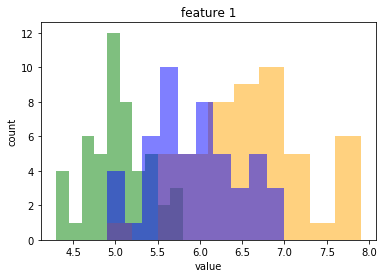

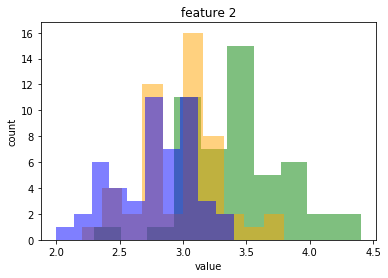

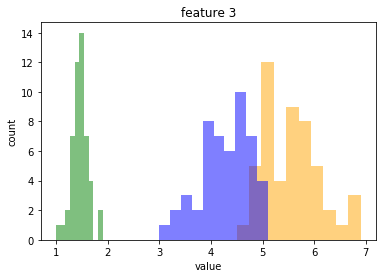

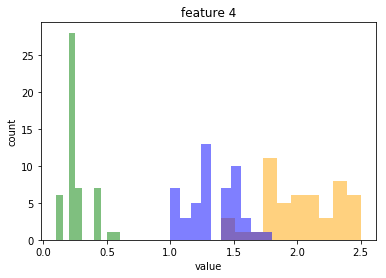

In [4]:
# examining the distributions for each class for each feature
# most of these distributions per class per feature seem relatively normal
for i in range(4):
    plt.hist(X[:,i][y==0],color="green",alpha=0.5)
    plt.hist(X[:,i][y==2],color="orange",alpha=0.5)
    plt.hist(X[:,i][y==1],color="blue",alpha=0.5)
    plt.title("feature {}".format(str(i+1)))
    plt.xlabel("value")
    plt.ylabel("count")
    plt.show()

### Modeling the likelihood distribution

In [5]:
# Using a gaussian distribution for the likelihood, sigma and x_bar are estimates based on sample data
# returns the likelihood of an observed value theta given a distribution based on observed sample
def likelihood(theta,x_bar,sigma,n=1):
    return np.exp((-(1/(2*(sigma**2)/n))) * (x_bar-theta)**2)

In [6]:
# creating a dictionary which holds sample sigma and x_bar for all classes and all features
data = {}
for class_no in [0,1,2]:
    for feature in [0,1,2,3]:
        key = "{}_{}".format(class_no,feature)
        x_bar = np.average(X_train[:,feature][y_train == class_no])
        sigma = np.std(X_train[:,feature][y_train == class_no])
        data[key] = {"x_bar":x_bar,"sigma":sigma}

In [7]:
# printing out the unique keys in dict
print(data.keys())

dict_keys(['0_0', '0_1', '0_2', '0_3', '1_0', '1_1', '1_2', '1_3', '2_0', '2_1', '2_2', '2_3'])


In [8]:
# model that takes in a examples and computes the probability for all three classes and performs argmax
def get_pred(data,ex):
    """
    data: dictionary holding sigmas and x_bars
    ex: example, input shape:(,4)
    """
    class_0_prob = get_prob(data,"0",ex)
    class_1_prob = get_prob(data,"1",ex)
    class_2_prob = get_prob(data,"2",ex)
    
    return np.argmax(np.array([class_0_prob,class_1_prob,class_2_prob]))

In [9]:
# returns the total likelihood probability over all features for a given class
def get_prob(data,class_no,ex):
    final_prob = 1
    for feature in [0,1,2,3]:
        key = class_no + "_" + str(feature)
        theta = ex[feature]
        a_prob = likelihood(theta,data[key]["x_bar"],data[key]["sigma"])
        final_prob = final_prob * a_prob
        
    return final_prob

### Testing naive bayes model performance

In [10]:
# predictions on hold out set
holdout_pred = [get_pred(data,X_hold[i,:]) for i in range(X_hold.shape[0])]

In [11]:
print("accuracy is:",accuracy_score(y_hold,holdout_pred))

accuracy is: 1.0
